In [1]:
import sys
from netCDF4 import Dataset
import os
import cmocean as cm
from trackeddy.tracking import *
from trackeddy.datastruct import *
from trackeddy.geometryfunc import *
from trackeddy.init import *
from trackeddy.physics import *
from trackeddy.plotfunc import *
from numpy import *
from pylab import *
import cmocean as cm
%matplotlib inline

/home/156/jm5970/.local/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
outfile='/g/data/v45/jm5970/trackeddy_out/'

In [3]:
read_dictionary1 = np.load(outfile+'306_pos.npy')
dict1=read_dictionary1.item()

In [4]:
read_dictionary1 = np.load(outfile+'306_pos.npy')
dict1=read_dictionary1.item()
read_dictionary2 = np.load(outfile+'307_pos.npy')
dict2=read_dictionary2.item()

read_dictionary3 = np.load(outfile+'308_pos.npy')
dict3=read_dictionary3.item()
read_dictionary4 = np.load(outfile+'309_pos.npy')
dict4=read_dictionary4.item()

In [4]:
def joindict(dict1,dict2):
    checklist=[]
    checklist1=[]
    checklist2=[]
    for key, value in list(dict1.items()):
        check=False
        #print(type(value['time']))
        if type(value['time'])==int or len(value['time'])==1:
            eddyxt0=value['position'][0]
            eddyyt0=value['position'][1]
            if value['time']>=89-5:
                check=True
                timee=value['time']
        else:
            #print(value['time'])
            #print(value['position'])
            eddyxt0=value['position'][-1][0]
            eddyyt0=value['position'][-1][1]
            if value['time'][-1]>=89-5:
                check=True
                timee=value['time'][-1]
        if check==True:
            if type(value['time'])==int:
                lonmi0=value['contour'][0][0].min()
                lonma0=value['contour'][0][0].max()
                latmi0=value['contour'][0][1].min()
                latma0=value['contour'][0][1].max()
            else:
                lonmi0=value['contour'][-1][0].min()
                lonma0=value['contour'][-1][0].max()
                latmi0=value['contour'][-1][1].min()
                latma0=value['contour'][-1][1].max()
                
            for key1, value1 in list(dict2.items()):
                if type(value1['time'])==int:
                    ts=value1['time']
                    eddyxt1=value1['position'][0]
                    eddyyt1=value1['position'][1]
                else:
                    ts=int(value1['time'][0])
                    eddyxt1=value1['position'][0][0]
                    eddyyt1=value1['position'][0][1]
                if ts<=5:
                    if (eddyxt1<=lonma0 and eddyxt1>=lonmi0 and eddyyt1<=latma0 and eddyyt1>=latmi0) and\
                        (eddyxt0<=lonma0 and eddyxt0>=lonmi0 and eddyyt0<=latma0 and eddyyt0>=latmi0):
                        dict1[key]={'neddy':int(value['neddy']),'time':np.vstack((value['time'],value1['time']+timee)),\
                                            'position':np.vstack((value['position'],value1['position'])),\
                                            'area':np.vstack((value['area'],value1['area'])),\
                                            'angle':np.vstack((value['angle'],value1['angle'])),\
                                            'ellipse':value['ellipse']+value1['ellipse'],\
                                            'contour':value['contour']+value1['contour'],\
                                            'position_eddy':np.vstack((value['position_eddy'],value1['position_eddy'])),\
                                            'level':np.vstack((value['level'],value1['level'])),\
                                            'minoraxis':np.vstack((value['minoraxis'],value1['minoraxis'])),\
                                            'majoraxis':np.vstack((value['majoraxis'],value1['majoraxis']))}
                        checklist.append(int(value['neddy']))
                        checklist1.append(int(value1['neddy']))
                        checklist2.append(key)
    neweddycount=1
    for key1, value1 in list(dict2.items()):
        #print(value1['neddy'],checklist1)
        #print((value1['neddy']!=checklist1))
        #print(value1['neddy'],checklist1)
        if type(value1['neddy']!=checklist1) is np.ndarray:
            check=(value1['neddy']!=checklist1).all()
        else:
            check=(value1['neddy']!=checklist1)
        if check:
            #print('eddyn_'+str(len(dict1)+neweddycount))
            dict1['eddyn_'+str(len(dict1)+neweddycount)]={'neddy':len(dict1)+neweddycount,\
                                            'time':value1['time']+timee,\
                                            'position':value1['position'],\
                                            'area':value1['area'],\
                                            'angle':value1['angle'],\
                                            'ellipse':value1['ellipse'],\
                                            'contour':value1['contour'],\
                                            'position_eddy':value1['position_eddy'],\
                                            'level':value1['level'],\
                                            'minoraxis':value1['minoraxis'],\
                                            'majoraxis':value1['majoraxis']}
            neweddycount=neweddycount+1
    #print(checklist1)
    #print(checklist2)
    #for key, value in list((dict1.items()!=checklist).all()):
    #    print(key)
    #print('check',len(checklist))
    #print('check1',len(checklist1))
    #print(neweddycount)
    return dict1

In [5]:
print(len(dict1))
print(len(dict2))
print(len(dict3))
print(len(dict4))

10503
11684
8464
7997


In [6]:
dictjoin=joindict(dict1,dict2)

dictjoin1=joindict(dict3,dict4)

KeyboardInterrupt: 

In [ ]:
print(len(dictjoin))
print(len(dictjoin1))

In [ ]:
yearjoin=joindict(dictjoin,dictjoin1)

In [ ]:
for key1, value1 in list(dictjoin.items()):
    print(key1)
    print(value1['time'])

[18]
[13]


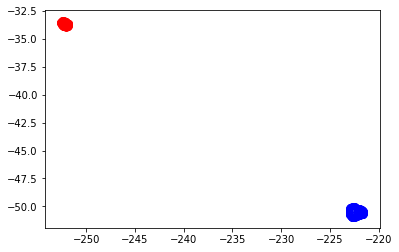

In [10]:
'eddyn_64', 'eddyn_66','eddyn_1015'
tt=-1
print(dictjoin['eddyn_49']['time'][tt])
print(dictjoin['eddyn_66']['time'][tt])
plot(dictjoin['eddyn_49']['contour'][tt][0],dictjoin['eddyn_49']['contour'][tt][1],'or')
plot(dictjoin['eddyn_66']['contour'][tt][0],dictjoin['eddyn_66']['contour'][tt][1],'ob')
plot(dictjoin['eddyn_49']['position'][tt][0],dictjoin['eddyn_49']['position'][tt][1],'or')
plot(dictjoin['eddyn_66']['position'][tt][0],dictjoin['eddyn_66']['position'][tt][1],'ob')

[0]


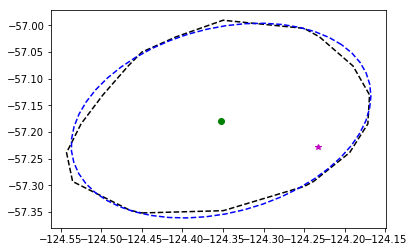

[1]


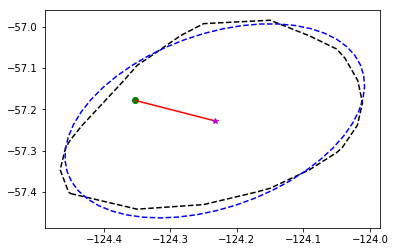

In [11]:
eddy=dict1['eddyn_59']

for ii in range(0,len(eddy['time'])):
    figure()
    print(eddy['time'][ii])
    plot(eddy['position_eddy'][0,0],eddy['position_eddy'][0,1],'og')
    plot(eddy['position_eddy'][0:ii+1,0],eddy['position_eddy'][0:ii+1,1],'r')
    plot(eddy['position_eddy'][-1,0],eddy['position_eddy'][-1,1],'*m')
    plot(eddy['contour'][ii][0],eddy['contour'][ii][1],'--k')
    plot(eddy['ellipse'][ii][0],eddy['ellipse'][ii][1],'--b')
    show()
    

[0]


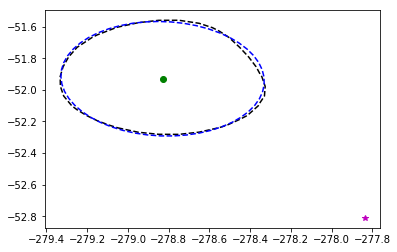

[1]


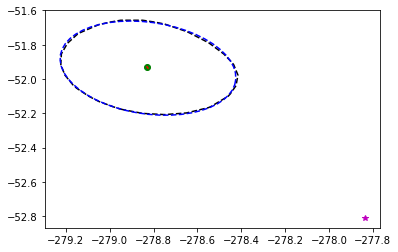

[2]


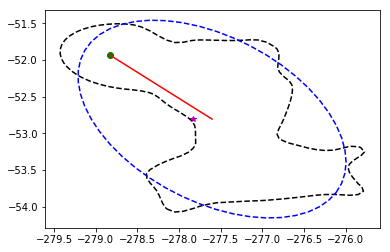

[4]


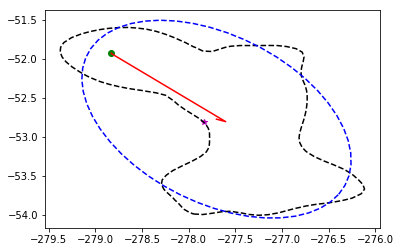

[5]


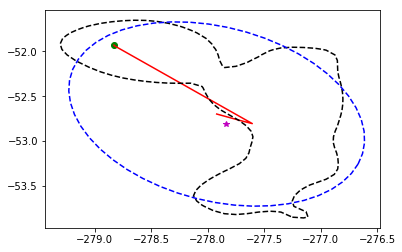

[6]


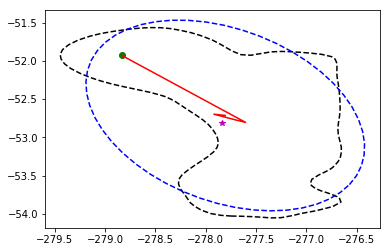

[7]


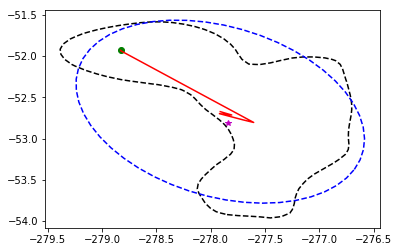

[8]


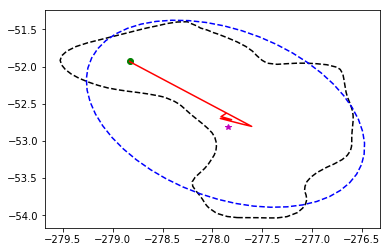

[10]


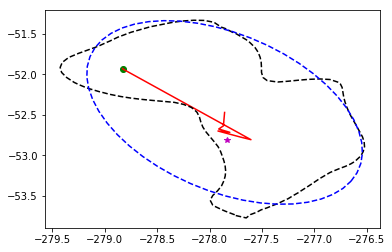

[11]


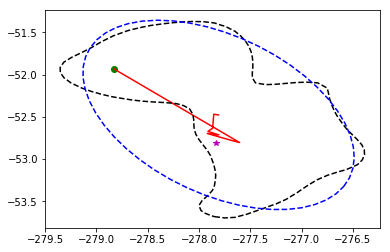

[13]


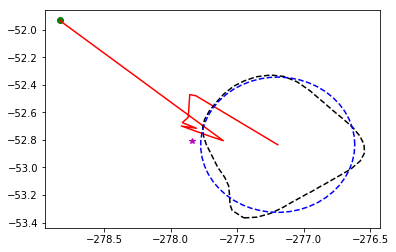

[14]


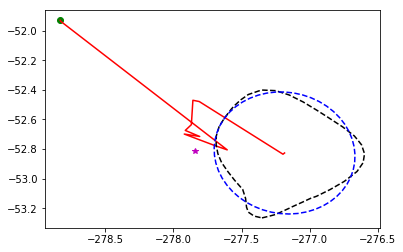

[15]


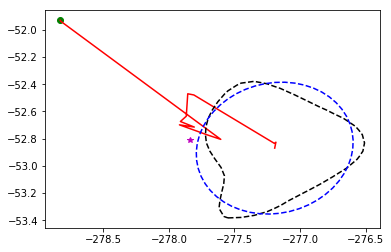

[16]


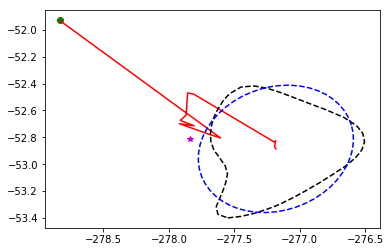

[17]


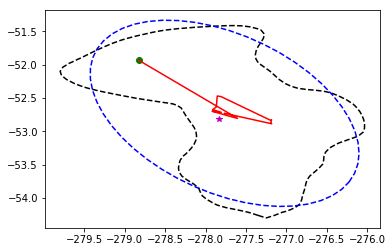

[18]


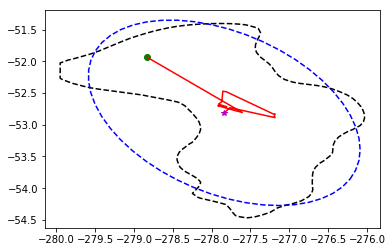

In [12]:
eddy=dict1['eddyn_64']

for ii in range(0,len(eddy['time'])):
    figure()
    print(eddy['time'][ii])
    plot(eddy['position_eddy'][0,0],eddy['position_eddy'][0,1],'og')
    plot(eddy['position_eddy'][0:ii+1,0],eddy['position_eddy'][0:ii+1,1],'r')
    plot(eddy['position_eddy'][-1,0],eddy['position_eddy'][-1,1],'*m')
    plot(eddy['contour'][ii][0],eddy['contour'][ii][1],'--k')
    plot(eddy['ellipse'][ii][0],eddy['ellipse'][ii][1],'--b')
    show()
    

In [4]:
def trackmatix(eddydict):
    eddy=0
    time=0
    for key,value in eddydict.items():
        if type(value['time'])!=int:
            if value['time'][-1]>time:
                time=value['time'][-1]+1

    positions=zeros([2,len(eddydict.items()),int(time)])
    for key,value in eddydict.items():
        if type(value['time'])==int:
            positions[0,eddy,value['time']]=value['position'][0]
            positions[1,eddy,value['time']]=value['position'][1]
        else:
            realinx=0
            for ii in value['time']:
                #print(ii)
                positions[0,eddy,ii]=squeeze(value['position'][realinx,0])
                positions[1,eddy,ii]=squeeze(value['position'][realinx,1])
                realinx=realinx+1
        eddy=eddy+1
    positions[positions==0]=np.nan
    return(positions)

In [5]:
positions=trackmatix(dict1)

In [6]:
for ii in range(shape(positions)[1]):
    sumjj=0
    for jj in range(shape(positions)[2]):
        if positions[0,ii,jj]!=0:
            sumjj=sumjj+1
    print(ii,sumjj)

0 90
1 90
2 90
3 90
4 90
5 90
6 90
7 90
8 90
9 90
10 90
11 90
12 90
13 90
14 90
15 90
16 90
17 90
18 90
19 90
20 90
21 90
22 90
23 90
24 90
25 90
26 90
27 90
28 90
29 90
30 90
31 90
32 90
33 90
34 90
35 90
36 90
37 90
38 90
39 90
40 90
41 90
42 90
43 90
44 90
45 90
46 90
47 90
48 90
49 90
50 90
51 90
52 90
53 90
54 90
55 90
56 90
57 90
58 90
59 90
60 90
61 90
62 90
63 90
64 90
65 90
66 90
67 90
68 90
69 90
70 90
71 90
72 90
73 90
74 90
75 90
76 90
77 90
78 90
79 90
80 90
81 90
82 90
83 90
84 90
85 90
86 90
87 90
88 90
89 90
90 90
91 90
92 90
93 90
94 90
95 90
96 90
97 90
98 90
99 90
100 90
101 90
102 90
103 90
104 90
105 90
106 90
107 90
108 90
109 90
110 90
111 90
112 90
113 90
114 90
115 90
116 90
117 90
118 90
119 90
120 90
121 90
122 90
123 90
124 90
125 90
126 90
127 90
128 90
129 90
130 90
131 90
132 90
133 90
134 90
135 90
136 90
137 90
138 90
139 90
140 90
141 90
142 90
143 90
144 90
145 90
146 90
147 90
148 90
149 90
150 90
151 90
152 90
153 90
154 90
155 90
156 90
157 90
158 

1951 90
1952 90
1953 90
1954 90
1955 90
1956 90
1957 90
1958 90
1959 90
1960 90
1961 90
1962 90
1963 90
1964 90
1965 90
1966 90
1967 90
1968 90
1969 90
1970 90
1971 90
1972 90
1973 90
1974 90
1975 90
1976 90
1977 90
1978 90
1979 90
1980 90
1981 90
1982 90
1983 90
1984 90
1985 90
1986 90
1987 90
1988 90
1989 90
1990 90
1991 90
1992 90
1993 90
1994 90
1995 90
1996 90
1997 90
1998 90
1999 90
2000 90
2001 90
2002 90
2003 90
2004 90
2005 90
2006 90
2007 90
2008 90
2009 90
2010 90
2011 90
2012 90
2013 90
2014 90
2015 90
2016 90
2017 90
2018 90
2019 90
2020 90
2021 90
2022 90
2023 90
2024 90
2025 90
2026 90
2027 90
2028 90
2029 90
2030 90
2031 90
2032 90
2033 90
2034 90
2035 90
2036 90
2037 90
2038 90
2039 90
2040 90
2041 90
2042 90
2043 90
2044 90
2045 90
2046 90
2047 90
2048 90
2049 90
2050 90
2051 90
2052 90
2053 90
2054 90
2055 90
2056 90
2057 90
2058 90
2059 90
2060 90
2061 90
2062 90
2063 90
2064 90
2065 90
2066 90
2067 90
2068 90
2069 90
2070 90
2071 90
2072 90
2073 90
2074 90
2075 90


3446 90
3447 90
3448 90
3449 90
3450 90
3451 90
3452 90
3453 90
3454 90
3455 90
3456 90
3457 90
3458 90
3459 90
3460 90
3461 90
3462 90
3463 90
3464 90
3465 90
3466 90
3467 90
3468 90
3469 90
3470 90
3471 90
3472 90
3473 90
3474 90
3475 90
3476 90
3477 90
3478 90
3479 90
3480 90
3481 90
3482 90
3483 90
3484 90
3485 90
3486 90
3487 90
3488 90
3489 90
3490 90
3491 90
3492 90
3493 90
3494 90
3495 90
3496 90
3497 90
3498 90
3499 90
3500 90
3501 90
3502 90
3503 90
3504 90
3505 90
3506 90
3507 90
3508 90
3509 90
3510 90
3511 90
3512 90
3513 90
3514 90
3515 90
3516 90
3517 90
3518 90
3519 90
3520 90
3521 90
3522 90
3523 90
3524 90
3525 90
3526 90
3527 90
3528 90
3529 90
3530 90
3531 90
3532 90
3533 90
3534 90
3535 90
3536 90
3537 90
3538 90
3539 90
3540 90
3541 90
3542 90
3543 90
3544 90
3545 90
3546 90
3547 90
3548 90
3549 90
3550 90
3551 90
3552 90
3553 90
3554 90
3555 90
3556 90
3557 90
3558 90
3559 90
3560 90
3561 90
3562 90
3563 90
3564 90
3565 90
3566 90
3567 90
3568 90
3569 90
3570 90


4931 90
4932 90
4933 90
4934 90
4935 90
4936 90
4937 90
4938 90
4939 90
4940 90
4941 90
4942 90
4943 90
4944 90
4945 90
4946 90
4947 90
4948 90
4949 90
4950 90
4951 90
4952 90
4953 90
4954 90
4955 90
4956 90
4957 90
4958 90
4959 90
4960 90
4961 90
4962 90
4963 90
4964 90
4965 90
4966 90
4967 90
4968 90
4969 90
4970 90
4971 90
4972 90
4973 90
4974 90
4975 90
4976 90
4977 90
4978 90
4979 90
4980 90
4981 90
4982 90
4983 90
4984 90
4985 90
4986 90
4987 90
4988 90
4989 90
4990 90
4991 90
4992 90
4993 90
4994 90
4995 90
4996 90
4997 90
4998 90
4999 90
5000 90
5001 90
5002 90
5003 90
5004 90
5005 90
5006 90
5007 90
5008 90
5009 90
5010 90
5011 90
5012 90
5013 90
5014 90
5015 90
5016 90
5017 90
5018 90
5019 90
5020 90
5021 90
5022 90
5023 90
5024 90
5025 90
5026 90
5027 90
5028 90
5029 90
5030 90
5031 90
5032 90
5033 90
5034 90
5035 90
5036 90
5037 90
5038 90
5039 90
5040 90
5041 90
5042 90
5043 90
5044 90
5045 90
5046 90
5047 90
5048 90
5049 90
5050 90
5051 90
5052 90
5053 90
5054 90
5055 90


6403 90
6404 90
6405 90
6406 90
6407 90
6408 90
6409 90
6410 90
6411 90
6412 90
6413 90
6414 90
6415 90
6416 90
6417 90
6418 90
6419 90
6420 90
6421 90
6422 90
6423 90
6424 90
6425 90
6426 90
6427 90
6428 90
6429 90
6430 90
6431 90
6432 90
6433 90
6434 90
6435 90
6436 90
6437 90
6438 90
6439 90
6440 90
6441 90
6442 90
6443 90
6444 90
6445 90
6446 90
6447 90
6448 90
6449 90
6450 90
6451 90
6452 90
6453 90
6454 90
6455 90
6456 90
6457 90
6458 90
6459 90
6460 90
6461 90
6462 90
6463 90
6464 90
6465 90
6466 90
6467 90
6468 90
6469 90
6470 90
6471 90
6472 90
6473 90
6474 90
6475 90
6476 90
6477 90
6478 90
6479 90
6480 90
6481 90
6482 90
6483 90
6484 90
6485 90
6486 90
6487 90
6488 90
6489 90
6490 90
6491 90
6492 90
6493 90
6494 90
6495 90
6496 90
6497 90
6498 90
6499 90
6500 90
6501 90
6502 90
6503 90
6504 90
6505 90
6506 90
6507 90
6508 90
6509 90
6510 90
6511 90
6512 90
6513 90
6514 90
6515 90
6516 90
6517 90
6518 90
6519 90
6520 90
6521 90
6522 90
6523 90
6524 90
6525 90
6526 90
6527 90


7927 90
7928 90
7929 90
7930 90
7931 90
7932 90
7933 90
7934 90
7935 90
7936 90
7937 90
7938 90
7939 90
7940 90
7941 90
7942 90
7943 90
7944 90
7945 90
7946 90
7947 90
7948 90
7949 90
7950 90
7951 90
7952 90
7953 90
7954 90
7955 90
7956 90
7957 90
7958 90
7959 90
7960 90
7961 90
7962 90
7963 90
7964 90
7965 90
7966 90
7967 90
7968 90
7969 90
7970 90
7971 90
7972 90
7973 90
7974 90
7975 90
7976 90
7977 90
7978 90
7979 90
7980 90
7981 90
7982 90
7983 90
7984 90
7985 90
7986 90
7987 90
7988 90
7989 90
7990 90
7991 90
7992 90
7993 90
7994 90
7995 90
7996 90
7997 90
7998 90
7999 90
8000 90
8001 90
8002 90
8003 90
8004 90
8005 90
8006 90
8007 90
8008 90
8009 90
8010 90
8011 90
8012 90
8013 90
8014 90
8015 90
8016 90
8017 90
8018 90
8019 90
8020 90
8021 90
8022 90
8023 90
8024 90
8025 90
8026 90
8027 90
8028 90
8029 90
8030 90
8031 90
8032 90
8033 90
8034 90
8035 90
8036 90
8037 90
8038 90
8039 90
8040 90
8041 90
8042 90
8043 90
8044 90
8045 90
8046 90
8047 90
8048 90
8049 90
8050 90
8051 90


9429 90
9430 90
9431 90
9432 90
9433 90
9434 90
9435 90
9436 90
9437 90
9438 90
9439 90
9440 90
9441 90
9442 90
9443 90
9444 90
9445 90
9446 90
9447 90
9448 90
9449 90
9450 90
9451 90
9452 90
9453 90
9454 90
9455 90
9456 90
9457 90
9458 90
9459 90
9460 90
9461 90
9462 90
9463 90
9464 90
9465 90
9466 90
9467 90
9468 90
9469 90
9470 90
9471 90
9472 90
9473 90
9474 90
9475 90
9476 90
9477 90
9478 90
9479 90
9480 90
9481 90
9482 90
9483 90
9484 90
9485 90
9486 90
9487 90
9488 90
9489 90
9490 90
9491 90
9492 90
9493 90
9494 90
9495 90
9496 90
9497 90
9498 90
9499 90
9500 90
9501 90
9502 90
9503 90
9504 90
9505 90
9506 90
9507 90
9508 90
9509 90
9510 90
9511 90
9512 90
9513 90
9514 90
9515 90
9516 90
9517 90
9518 90
9519 90
9520 90
9521 90
9522 90
9523 90
9524 90
9525 90
9526 90
9527 90
9528 90
9529 90
9530 90
9531 90
9532 90
9533 90
9534 90
9535 90
9536 90
9537 90
9538 90
9539 90
9540 90
9541 90
9542 90
9543 90
9544 90
9545 90
9546 90
9547 90
9548 90
9549 90
9550 90
9551 90
9552 90
9553 90


In [7]:
59
243
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output306/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta=ncfile.variables['eta_t'][:]*100
# Import geographic coordinates (Lon,Lat)
lon=ncfile.variables['xt_ocean_sub01'][:]
lat=ncfile.variables['yt_ocean_sub01'][:]
ssha=eta

In [8]:
# Output data path
outputpath='/g/data/v45/akm157/model_output/mom/mom01v5_kds75/output307/'
# Import SSH values to python environment.
ncfile=Dataset(outputpath+'rregionsouthern_ocean_daily_eta_t.nc')
eta1=ncfile.variables['eta_t'][:]*100


In [10]:
ssha=vstack((eta,eta1))
print(shape(ssha))

(181, 931, 3600)


In [11]:
eddys=[59,243]
from matplotlib import animation, rc
# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')

fig = plt.figure(figsize=(10, 10),facecolor='white')
gs = gridspec.GridSpec(2, 1)

ax1 = plt.subplot(gs[0,0])

lonmm,latmm=np.meshgrid(lon,lat)

map = Basemap(projection='ortho',lat_0=-90,lon_0=-100,resolution='c',ax=ax1)
lonm,latm=map(lonmm,latmm)
map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
map.fillcontinents(color='black',lake_color='aqua')
map.drawcoastlines()
map.drawcoastlines()

#ax2 = plt.subplot(gs[0,1])

#map = Basemap(projection='ortho',lat_0=-90,lon_0=-100,resolution='c',ax=ax2)
#lonm,latm=map(lonmm,latmm)
#map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
#map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
#map.fillcontinents(color='black',lake_color='aqua')
#map.drawcoastlines()
#map.drawcoastlines()
    
xx2,yy2=map(positions[0,eddys[0],:],positions[1,eddys[0],:])
xx2[xx2==1.00000000e+30]==np.nan
yy2[yy2==1.00000000e+30]==np.nan

xx3,yy3=map(positions[0,eddys[1],:],positions[1,eddys[1],:])
xx3[xx3==1.00000000e+30]==np.nan
yy3[yy3==1.00000000e+30]==np.nan
    
quad1 = ax1.pcolormesh(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
          vmin=-80,vmax=80)
line1,=ax1.plot(xx2[0],yy2[0],'*g')
line2,=ax1.plot(xx2[-1],yy2[-1],'om')
    
#quad2 = ax2.pcolormesh(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
#          vmin=-80,vmax=80)
#ax2.plot(xx3[0],yy3[0],'*g')
#ax2.plot(xx3[-1],yy3[-1],'om')

ax3 = plt.subplot(gs[1,0])
ax3.plot(positions[0,eddys[0],0],positions[1,eddys[0],0],'*g')
ax3.plot(positions[0,eddys[0],-1],positions[1,eddys[0],-1],'om')
line3,=ax3.plot(positions[0,eddys[0],0],positions[1,eddys[0],0],'-k')

#ax4 = plt.subplot(gs[1,1])
#ax4.plot(positions[0,eddys[1],0],positions[1,eddys[1],0],'*g')
#ax4.plot(positions[0,eddys[1],-1],positions[1,eddys[1],-1],'om')
#line4,=ax4.plot(positions[0,eddys[1],0],positions[1,eddys[1],0],'-k')
    
def init():
    quad1.set_array([])
    quad2.set_array([])
    return quad1
    
def animate(iter):
    quad1.set_array(ssha[iter,:,:].ravel())
    quad2.set_array(ssha[iter,:,:].ravel())
    line1.set_data(positions[0,eddys[0],0:iter],positions[1,eddys[0],0:iter])
    line2.set_data(positions[0,eddys[1],0:iter],positions[1,eddys[1],0:iter])
    line3.set_data(positions[0,eddys[0],0:iter],positions[1,eddys[0],0:iter])
    line4.set_data(positions[0,eddys[1],0:iter],positions[1,eddys[1],0:iter])
    plt.suptitle('Time: %03d'%(iter))
    sys.stdout.write("\r\x1b[K"+iter.__str__())
    sys.stdout.flush()
    return quad1
    
gs.tight_layout(fig)
    
anim2 = animation.FuncAnimation(fig,animate,frames=30,interval=100,blit=False,repeat=True)
plt.close()
anim2    

29ng: Cannot label parallels on Orthographic basemap

In [19]:
eddy1=0
eddy2=46 
eddy3=3459

for iiter in range(76,180):
    fig = plt.figure(figsize=(10, 10),facecolor='white')
    gs = gridspec.GridSpec(2, 2)

    ax1 = plt.subplot(gs[0,0])

    lonmm,latmm=np.meshgrid(lon,lat)

    map = Basemap(projection='ortho',lat_0=-90,lon_0=-100,resolution='c',ax=ax1)
    lonm,latm=map(lonmm,latmm)
    map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
    map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
    map.fillcontinents(color='black',lake_color='aqua')
    map.drawcoastlines()
    map.drawcoastlines()

    ax2 = plt.subplot(gs[0,1])

    map = Basemap(projection='ortho',lat_0=-90,lon_0=-100,resolution='c',ax=ax2)
    lonm,latm=map(lonmm,latmm)
    map.drawmeridians(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
    map.drawparallels(np.arange(0,360,30),labels=[1,1,0,0],fontsize=10)
    map.fillcontinents(color='black',lake_color='aqua')
    map.drawcoastlines()
    map.drawcoastlines()
    
    xx2,yy2=map(positions[0,eddy2,:],positions[1,eddy2,:])
    xx2[xx2==1.00000000e+30]==np.nan
    yy2[yy2==1.00000000e+30]==np.nan

    xx3,yy3=map(positions[0,eddy3,:],positions[1,eddy3,:])
    xx3[xx3==1.00000000e+30]==np.nan
    yy3[yy3==1.00000000e+30]==np.nan
    
    quad1 = ax1.pcolormesh(lonm,latm,ssha[iiter,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-80,vmax=80)
    ax1.plot(xx2[0],yy2[0],'*g')
    ax1.plot(xx2[-1],yy2[-1],'om')
    
    quad2 = ax2.pcolormesh(lonm,latm,ssha[0,:,:],shading='gouraud',cmap=cm.cm.balance,\
              vmin=-80,vmax=80)
    ax2.plot(xx3[0],yy3[0],'*g')
    ax2.plot(xx3[-1],yy3[-1],'om')

    ax3 = plt.subplot(gs[1,0])
    ax3.plot(positions[0,eddy2,0],positions[1,eddy2,0],'*g')
    ax3.plot(positions[0,eddy2,-1],positions[1,eddy2,-1],'om')
    ax3.plot(positions[0,eddy2,0:iiter],positions[1,eddy2,0:iiter],'-k')

    ax4 = plt.subplot(gs[1,1])
    ax4.plot(positions[0,eddy3,0],positions[1,eddy3,0],'*g')
    ax4.plot(positions[0,eddy3,-1],positions[1,eddy3,-1],'om')
    ax4.plot(positions[0,eddy3,0:iiter],positions[1,eddy3,0:iiter],'-k')
    
    fig.savefig('/g/data1/v45/jm5970/trackeddy_out/figures_tmp/eddytrack_'+'%03d' % iiter +'.png', bbox_inches='tight')
    plt.close()

MemoryError: 

MemoryError: 

In [ ]:
def trackmatix(eddydict):
    eddy=0
    time=0
    for key,value in eddydict.items():
        if type(value['time'])!=int:
            if value['time'][-1]>time:
                time=value['time'][-1]+1

    positions=zeros([2,len(eddydict.items()),int(time)])
    for key,value in eddydict.items():
        if type(value['time'])==int:
            positions[0,eddy,value['time']]=value['position'][0]
            positions[1,eddy,value['time']]=value['position'][1]
        else:
            realinx=0
            for ii in value['time']:
                #print(ii)
                positions[0,eddy,ii]=squeeze(value['position'][realinx,0])
                positions[1,eddy,ii]=squeeze(value['position'][realinx,1])
                realinx=realinx+1
        eddy=eddy+1
    positions[positions==0]=0
    return positions

In [ ]:
positions=trackmatix(dict1)

In [ ]:
for ii in range(shape(positions)[1]):
    sumjj=0
    for jj in range(shape(positions)[2]):
        if positions[0,ii,jj]>112:
            sumjj=sumjj+1
    print(ii,sumjj)